Q1B, q2B, 3B

1B

In [720]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [721]:
df = pd.DataFrame(pd.read_csv('https://raw.githubusercontent.com/Onkar-Indurkar/Intro-to-ML/main/Housing.csv'))
df.head()
m = len(df)

In [722]:
#converting yes's & no's to 1s & 0s as strings cannot be used only int

list1 = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map (v1) :
    return v1.map({'yes' : 1, "no": 0})

df[list1] = df[list1] . apply(binary_map)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [723]:
#To not get any faulty errors eg Nan also not asked in Q -
df = df.drop(labels = "furnishingstatus",axis=1)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,1,0,0,0,1,2,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0


In [724]:
#splitting dataframe into 80% training data & 20% testing data
np.random.seed(0)
dfTrain, dfTest =train_test_split(df, train_size = 0.8, test_size = 0.2)
dfTrain.shape

(436, 12)

In [725]:
list2 = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
dfTrainA = dfTrain[list2]
dfTestA = dfTest[list2]
dfTrainA.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
542,1750000,3620,2,1,1,1,0,0,0,0,0,0
496,2695000,4000,2,1,1,1,0,0,0,0,0,0
484,2870000,3040,2,1,1,0,0,0,0,0,0,0
507,2590000,3600,2,1,1,1,0,0,0,0,0,0
252,4515000,9860,3,1,1,1,0,0,0,0,0,0


In [726]:
dfTrainA.shape

(436, 12)

In [727]:
yTrain = dfTrainA.values[:,0]
xTrain = dfTrainA.values[:,1:12]
yTest = dfTestA.values[:,0]
xTest = dfTestA.values[:,1:12]
xTrain.shape

(436, 11)

In [728]:
xTest.shape

(109, 11)

In [729]:
#1 col of ones
x11 = np.ones((436, 1)) 
x12 = np.ones((109, 1))

In [730]:
# 1d to 2d
x21 = xTrain.reshape(436, 11) 
x22 = xTest.reshape(109, 11)

In [731]:
xTrainNew = np.hstack((x11, x21))
xTestNew = np.hstack((x12, x22))
xTrainNew.shape

(436, 12)

In [732]:
iterations = 1000; 
alpha = 0.000000001;

theta = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
theta

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [733]:
def compute_cost(X, Y, theta): 
    predictions = X.dot(theta) 
    errors = np.subtract(predictions, Y) 
    sqrErrors = np.square(errors) 
    J = 1 / (2 * m) * np.sum(sqrErrors) 

    return J

In [734]:
def gradient_descent(X1, X2, Y1 , Y2, theta, alpha, iterations):
    costHistoryTrain = np.zeros(iterations) 
    costHistoryTest = np.zeros(iterations) 

    for i in range(iterations): 
        predictions = X1.dot(theta) 
        errors = np.subtract(predictions, Y1) 
        sum_delta = (alpha / m) * X1.transpose().dot(errors); 
        theta = theta - sum_delta; 
        costHistoryTrain[i] = compute_cost(X1, Y1, theta)   
        costHistoryTest[i] = compute_cost(X2, Y2, theta)
    return theta, costHistoryTrain, costHistoryTest

In [735]:
theta, costHistoryTrain, costHistoryTest = gradient_descent(xTrainNew, xTestNew, yTrain, yTest, theta, alpha, iterations) 
print('Final value of theta =', theta) 
print('costHistoryTrain =', costHistoryTrain[-1], 'costHistoryTest= ', costHistoryTest[-1])

# print('costHistoryTest array =')
# costHistoryTest

Final value of theta = [4.16134503e-01 8.61036221e+02 1.49720328e+00 7.88268149e-01
 1.19127732e+00 3.76967060e-01 1.56671026e-01 2.57835061e-01
 6.13757700e-02 2.98030922e-01 3.85293377e-01 1.71925936e-01]
costHistoryTrain = 1363688558628.3276 costHistoryTest=  310132069893.81555


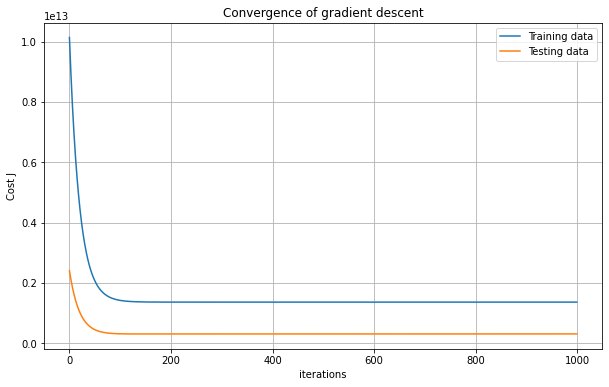

In [736]:
plt.plot(costHistoryTrain, label = "Training data")
plt.plot(costHistoryTest, label = "Testing data")
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('iterations')
plt.ylabel('Cost J')
plt.title('Convergence of gradient descent')
plt.legend()

In [737]:
print("Final Theta - ")
print(theta)

Final Theta - 
[4.16134503e-01 8.61036221e+02 1.49720328e+00 7.88268149e-01
 1.19127732e+00 3.76967060e-01 1.56671026e-01 2.57835061e-01
 6.13757700e-02 2.98030922e-01 3.85293377e-01 1.71925936e-01]


2B normalization

In [738]:
df = pd.DataFrame(pd.read_csv('https://raw.githubusercontent.com/Onkar-Indurkar/Intro-to-ML/main/Housing.csv'))
df.head()
m = len(df)

In [739]:
#splitting dataframe into 80% training data & 20% testing data
np.random.seed(0)
dfTrain, dfTest =train_test_split(df, train_size = 0.8, test_size = 0.2)
dfTrain.shape

(436, 13)

In [740]:
#converting yes's & no's to 1s & 0s as strings cannot be used only int

list1 = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map (v1) :
    return v1.map({'yes' : 1, "no": 0})

df[list1] = df[list1] . apply(binary_map)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [741]:
#To not get any faulty errors eg Nan also not asked in Q -
df = df.drop(labels = "furnishingstatus",axis=1)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,1,0,0,0,1,2,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0


In [742]:
#splitting dataframe into 80% training data & 20% testing data
np.random.seed(0)
dfTrain, dfTest =train_test_split(df, train_size = 0.8, test_size = 0.2)
dfTrain.shape

(436, 12)

In [743]:
list2 = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
dfTrainB = dfTrain[list2]
dfTestB = dfTest[list2]
dfTrainB.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
542,1750000,3620,2,1,1,1,0,0,0,0,0,0
496,2695000,4000,2,1,1,1,0,0,0,0,0,0
484,2870000,3040,2,1,1,0,0,0,0,0,0,0
507,2590000,3600,2,1,1,1,0,0,0,0,0,0
252,4515000,9860,3,1,1,1,0,0,0,0,0,0


In [744]:
import warnings
warnings. filterwarnings( 'ignore' )
from sklearn. preprocessing import MinMaxScaler, StandardScaler, Normalizer

#scaler = StandardScaler()  #uncomment when testing standardization
#scaler = MinMaxScaler().   #uncomment when testing Minmaxscaler
scaler = Normalizer()     


dfTrainB[list2] = scaler.fit_transform(dfTrainB[list2])
dfTestB[list2] = scaler.fit_transform(dfTestB[list2])

dfTrainB.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
542,0.999998,0.002069,1.142855e-06,5.714273e-07,5.714273e-07,5.714273e-07,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00
496,0.999999,0.001484,7.421142e-07,3.710571e-07,3.710571e-07,3.710571e-07,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00
484,0.999999,0.001059,6.968637e-07,3.484319e-07,3.484319e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00
507,0.999999,0.001390,7.722000e-07,3.861000e-07,3.861000e-07,3.861000e-07,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00
252,0.999998,0.002184,6.644502e-07,2.214834e-07,2.214834e-07,2.214834e-07,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00
263,1.000000,0.000900,6.802718e-07,2.267573e-07,4.535146e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00
240,1.000000,0.000838,6.543073e-07,2.181024e-07,4.362049e-07,2.181024e-07,0.000000e+00,0.000000e+00,0.0,0.0,2.181024e-07,2.181024e-07
175,0.999998,0.001867,7.619034e-07,3.809517e-07,3.809517e-07,1.904759e-07,1.904759e-07,0.000000e+00,0.0,0.0,3.809517e-07,0.000000e+00
385,0.999999,0.001020,5.602238e-07,2.801119e-07,2.801119e-07,2.801119e-07,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00
374,1.000000,0.000967,5.494503e-07,5.494503e-07,2.747251e-07,2.747251e-07,0.000000e+00,2.747251e-07,0.0,0.0,0.000000e+00,0.000000e+00


In [745]:
dfTrainB.shape

(436, 12)

In [746]:
yTrainB = dfTrainB.values[:,0]
xTrainB = dfTrainB.values[:,1:12]

yTestB = dfTestB.values[:,0]
xTestB = dfTestB.values[:,1:12]

xTrainB.shape

(436, 11)

In [747]:
xTestB.shape

(109, 11)

In [748]:
#1 col of ones
x31 = np.ones((436, 1)) 
x32 = np.ones((109, 1))

In [749]:
# 1d to 2d
x41 = xTrainB.reshape(436, 11) 
x42 = xTestB.reshape(109, 11)

In [750]:
xTrainNewB = np.hstack((x31, x41))
xTestNewB = np.hstack((x32, x42))
xTrainNewB.shape

(436, 12)

In [751]:
iterations = 1000; 
alpha = 0.01;

theta = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
theta

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [752]:
def compute_cost(X, Y, theta): 
    predictions = X.dot(theta) 
    errors = np.subtract(predictions, Y) 
    sqrErrors = np.square(errors) 
    J = 1 / (2 * m) * np.sum(sqrErrors) 

    return J

In [753]:
def gradient_descent(X1, X2, Y1 , Y2, theta, alpha, iterations):
    costHistoryTrain = np.zeros(iterations) 
    costHistoryTest = np.zeros(iterations) 

    for i in range(iterations): 
        predictions = X1.dot(theta) 
        errors = np.subtract(predictions, Y1) 
        sum_delta = (alpha / m) * X1.transpose().dot(errors); 
        theta = theta - sum_delta; 
        costHistoryTrain[i] = compute_cost(X1, Y1, theta)   
        costHistoryTest[i] = compute_cost(X2, Y2, theta)
    return theta, costHistoryTrain, costHistoryTest

In [754]:
theta, costHistoryTrain, costHistoryTest = gradient_descent(xTrainNewB, xTestNewB, yTrainB, yTestB, theta, alpha, iterations) 
print('Final value of theta =', theta) 
print('costHistoryTrain =', costHistoryTrain[-1], 'costHistoryTest= ', costHistoryTest[-1])

# print('costHistoryTest array =')
# costHistoryTest

Final value of theta = [9.99673091e-01 1.14635808e-03 6.88542215e-07 2.90254116e-07
 4.07258102e-07 1.99021182e-07 3.28132476e-08 6.83660767e-08
 7.81297850e-09 6.03495191e-08 1.45736036e-07 4.50717928e-08]
costHistoryTrain = 4.2208536013996063e-08 costHistoryTest=  1.055738594259816e-08


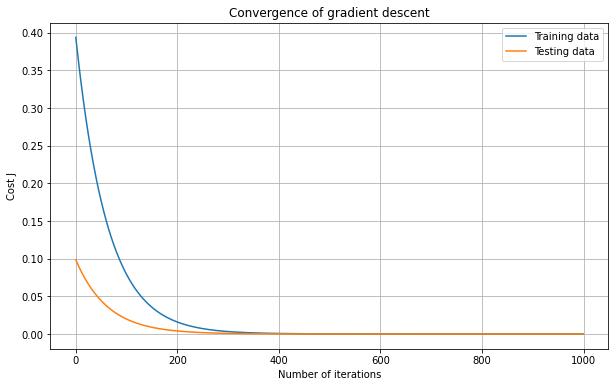

In [755]:
plt.plot(costHistoryTrain, label = "Training data")
plt.plot(costHistoryTest, label = "Testing data")
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.title('Convergence of gradient descent')
plt.legend()

In [756]:
print("Final Theta - ")
print(theta)

Final Theta - 
[9.99673091e-01 1.14635808e-03 6.88542215e-07 2.90254116e-07
 4.07258102e-07 1.99021182e-07 3.28132476e-08 6.83660767e-08
 7.81297850e-09 6.03495191e-08 1.45736036e-07 4.50717928e-08]


2b standardization

In [757]:
df = pd.DataFrame(pd.read_csv('https://raw.githubusercontent.com/Onkar-Indurkar/Intro-to-ML/main/Housing.csv'))
df.head()
m = len(df)

In [758]:
#splitting dataframe into 80% training data & 20% testing data
np.random.seed(0)
dfTrain, dfTest =train_test_split(df, train_size = 0.8, test_size = 0.2)
dfTrain.shape

(436, 13)

In [759]:
#converting yes's & no's to 1s & 0s as strings cannot be used only int

list1 = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map (v1) :
    return v1.map({'yes' : 1, "no": 0})

df[list1] = df[list1] . apply(binary_map)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [760]:
#To not get any faulty errors eg Nan also not asked in Q -
df = df.drop(labels = "furnishingstatus",axis=1)
#df.head()

In [761]:
#splitting dataframe into 80% training data & 20% testing data
np.random.seed(0)
dfTrain, dfTest =train_test_split(df, train_size = 0.8, test_size = 0.2)
dfTrain.shape

(436, 12)

In [762]:
list2 = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
dfTrainB = dfTrain[list2]
dfTestB = dfTest[list2]
#dfTrainB.head()

In [763]:
import warnings
warnings. filterwarnings( 'ignore' )
from sklearn. preprocessing import MinMaxScaler, StandardScaler, Normalizer

scaler = StandardScaler()  #uncomment when testing standardization
#scaler = MinMaxScaler().   #uncomment when testing Minmaxscaler
#scaler = Normalizer()     


dfTrainB[list2] = scaler.fit_transform(dfTrainB[list2])
dfTestB[list2] = scaler.fit_transform(dfTestB[list2])

dfTrainB.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
542,-1.586001,-0.716772,-1.294376,-0.573307,-0.933142,0.395599,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288
496,-1.090971,-0.538936,-1.294376,-0.573307,-0.933142,0.395599,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288
484,-0.999299,-0.988206,-1.294376,-0.573307,-0.933142,-2.527811,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288
507,-1.145974,-0.726132,-1.294376,-0.573307,-0.933142,0.395599,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288
252,-0.137579,2.203478,0.052516,-0.573307,-0.933142,0.395599,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288
263,-0.192583,-0.553912,0.052516,-0.573307,0.212914,-2.527811,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288
240,-0.100910,-0.613815,0.052516,-0.573307,0.212914,0.395599,-0.463125,-0.698609,-0.201427,-0.691351,0.325559,1.753501
175,0.247444,2.175399,1.399408,1.475561,0.212914,0.395599,2.159245,-0.698609,-0.201427,-0.691351,1.470267,-0.570288
385,-0.632610,-0.707412,-1.294376,-0.573307,-0.933142,0.395599,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288
374,-0.595941,-0.763571,-1.294376,1.475561,-0.933142,0.395599,-0.463125,1.431416,-0.201427,-0.691351,-0.819149,-0.570288


In [764]:
dfTrainB.shape

(436, 12)

In [765]:
yTrainB = dfTrainB.values[:,0]
xTrainB = dfTrainB.values[:,1:12]

yTestB = dfTestB.values[:,0]
xTestB = dfTestB.values[:,1:12]

xTrainB.shape

(436, 11)

In [766]:
xTestB.shape

(109, 11)

In [767]:
#1 col of ones
x31 = np.ones((436, 1)) 
x32 = np.ones((109, 1))

In [768]:
# 1d to 2d
x41 = xTrainB.reshape(436, 11) 
x42 = xTestB.reshape(109, 11)

In [769]:
xTrainNewB = np.hstack((x31, x41))
xTestNewB = np.hstack((x32, x42))
xTrainNewB.shape

(436, 12)

In [770]:
iterations = 1000; 
alpha = 0.01;

theta = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
theta

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [771]:
def compute_cost(X, Y, theta): 
    predictions = X.dot(theta) 
    errors = np.subtract(predictions, Y) 
    sqrErrors = np.square(errors) 
    J = 1 / (2 * m) * np.sum(sqrErrors) 

    return J

In [772]:
def gradient_descent(X1, X2, Y1 , Y2, theta, alpha, iterations):
    costHistoryTrain = np.zeros(iterations) 
    costHistoryTest = np.zeros(iterations) 

    for i in range(iterations): 
        predictions = X1.dot(theta) 
        errors = np.subtract(predictions, Y1) 
        sum_delta = (alpha / m) * X1.transpose().dot(errors); 
        theta = theta - sum_delta; 
        costHistoryTrain[i] = compute_cost(X1, Y1, theta)   
        costHistoryTest[i] = compute_cost(X2, Y2, theta)
    return theta, costHistoryTrain, costHistoryTest

In [773]:
theta, costHistoryTrain, costHistoryTest = gradient_descent(xTrainNewB, xTestNewB, yTrainB, yTestB, theta, alpha, iterations) 
print('Final value of theta =', theta) 
print('costHistoryTrain =', costHistoryTrain[-1], 'costHistoryTest= ', costHistoryTest[-1])

# print('costHistoryTest array =')
# costHistoryTest

Final value of theta = [2.66486120e-16 2.85466367e-01 5.85510599e-02 2.60010697e-01
 1.98840802e-01 8.65573865e-02 8.85477294e-02 8.59667386e-02
 1.26174544e-01 2.19948910e-01 1.12328332e-01 1.60748648e-01]
costHistoryTrain = 0.13132791876005034 costHistoryTest=  0.03198914525570618


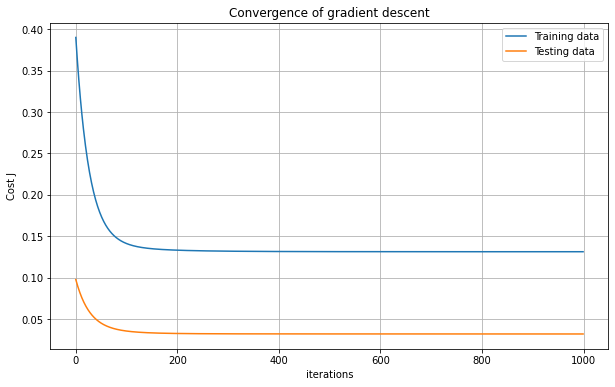

In [774]:
plt.plot(costHistoryTrain, label = "Training data")
plt.plot(costHistoryTest, label = "Testing data")
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('iterations')
plt.ylabel('Cost J')
plt.title('Convergence of gradient descent')
plt.legend()

In [775]:
print("Final Theta - ")
print(theta)

Final Theta - 
[2.66486120e-16 2.85466367e-01 5.85510599e-02 2.60010697e-01
 1.98840802e-01 8.65573865e-02 8.85477294e-02 8.59667386e-02
 1.26174544e-01 2.19948910e-01 1.12328332e-01 1.60748648e-01]


3B Normalizer

In [776]:
df = pd.DataFrame(pd.read_csv('https://raw.githubusercontent.com/Onkar-Indurkar/Intro-to-ML/main/Housing.csv'))
df.head()
m = len(df)

In [777]:
#converting yes's & no's to 1s & 0s as strings cannot be used only int

list1 = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map (v1) :
    return v1.map({'yes' : 1, "no": 0})

df[list1] = df[list1] . apply(binary_map)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [778]:
#To not get any faulty errors eg Nan also not asked in Q -
df = df.drop(labels = "furnishingstatus",axis=1)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,1,0,0,0,1,2,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0


In [779]:
#splitting dataframe into 80% training data & 20% testing data
np.random.seed(0)
dfTrain, dfTest =train_test_split(df, train_size = 0.8, test_size = 0.2)
dfTrain.shape

(436, 12)

In [780]:
list2 = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
dfTrainC = dfTrain[list2]
dfTestC = dfTest[list2]
dfTrainC.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
542,1750000,3620,2,1,1,1,0,0,0,0,0,0
496,2695000,4000,2,1,1,1,0,0,0,0,0,0
484,2870000,3040,2,1,1,0,0,0,0,0,0,0
507,2590000,3600,2,1,1,1,0,0,0,0,0,0
252,4515000,9860,3,1,1,1,0,0,0,0,0,0


In [781]:
import warnings
warnings. filterwarnings( 'ignore' )
from sklearn. preprocessing import MinMaxScaler, StandardScaler, Normalizer

#scaler = StandardScaler()  #uncomment when testing standardization
#scaler = MinMaxScaler().   #uncomment when testing Minmaxscaler
scaler = Normalizer()       #uncomment when testing normalization

dfTrainC[list2] = scaler.fit_transform(dfTrainC[list2])
dfTestC[list2] = scaler.fit_transform(dfTestC[list2])

dfTrainB.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
542,-1.586001,-0.716772,-1.294376,-0.573307,-0.933142,0.395599,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288
496,-1.090971,-0.538936,-1.294376,-0.573307,-0.933142,0.395599,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288
484,-0.999299,-0.988206,-1.294376,-0.573307,-0.933142,-2.527811,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288
507,-1.145974,-0.726132,-1.294376,-0.573307,-0.933142,0.395599,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288
252,-0.137579,2.203478,0.052516,-0.573307,-0.933142,0.395599,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288
263,-0.192583,-0.553912,0.052516,-0.573307,0.212914,-2.527811,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288
240,-0.100910,-0.613815,0.052516,-0.573307,0.212914,0.395599,-0.463125,-0.698609,-0.201427,-0.691351,0.325559,1.753501
175,0.247444,2.175399,1.399408,1.475561,0.212914,0.395599,2.159245,-0.698609,-0.201427,-0.691351,1.470267,-0.570288
385,-0.632610,-0.707412,-1.294376,-0.573307,-0.933142,0.395599,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288
374,-0.595941,-0.763571,-1.294376,1.475561,-0.933142,0.395599,-0.463125,1.431416,-0.201427,-0.691351,-0.819149,-0.570288


In [782]:
dfTrainC.shape

(436, 12)

In [783]:
yTrainC = dfTrainC.values[:,0]
xTrainC = dfTrainC.values[:,1:12]
yTestC = dfTestC.values[:,0]
xTestC = dfTestC.values[:,1:12]
xTrainC.shape

(436, 11)

In [784]:
xTestC.shape

(109, 11)

In [785]:
#1 col of ones
x51 = np.ones((436, 1)) 
x52 = np.ones((109, 1))

In [786]:
# 1d to 2d
x61 = xTrainC.reshape(436, 11) 
x62 = xTestC.reshape(109, 11)

In [787]:
xTrainNewC = np.hstack((x31, x41))
xTestNewC = np.hstack((x32, x42))
xTrainNewC.shape

(436, 12)

In [788]:
iterations = 5000; 
alpha = 0.01;
lamda : 3

theta = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
theta

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [789]:
def compute_cost_reg(X, Y, theta, lamda): 
    predictions = X.dot(theta) 
    errors = np.subtract(predictions, Y) 
    sqrErrors = np.square(errors) 
    sqrErrors = np.sum(sqrErrors)
    reg_term = lamda * np.sum(np.square(theta))
    J = 1 / (2 * m) * np.sum(sqrErrors + reg_term) 

    return J

In [790]:
def gradient_descent_reg(X1, X2, Y1 , Y2, theta, alpha, iterations, lamda):
    costHistoryTrain = np.zeros(iterations) 
    costHistoryTest = np.zeros(iterations) 
    lamda = 3

    for i in range(iterations): 
        predictions = X1.dot(theta) 
        errors = np.subtract(predictions, Y1) 
        sum_delta = (alpha / m) * X1.transpose().dot(errors); 
        theta = theta - sum_delta;
        costHistoryTrain[i] = compute_cost_reg(X1, Y1, theta, lamda)   
        costHistoryTest[i] = compute_cost(X2, Y2, theta)
    return theta, costHistoryTrain, costHistoryTest

In [791]:
theta, costHistoryTrain, costHistoryTest = gradient_descent_reg(xTrainNewC, xTestNewC, yTrainC, yTestC, theta, alpha, iterations, lamda=3 ) 
print('Final value of theta =', theta) 
print('costHistoryTrain =', costHistoryTrain[-1], 'costHistoryTest= ', costHistoryTest[-1])

Final value of theta = [ 9.99999244e-01 -4.95453932e-07  6.06190609e-08  1.28659290e-07
  1.08164245e-07  4.05782886e-08  5.14875188e-08  7.59147942e-08
  5.01040682e-08  1.30983936e-07  5.66143471e-08  1.16840533e-07]
costHistoryTrain = 0.0027522894144052217 costHistoryTest=  9.980633506597963e-15


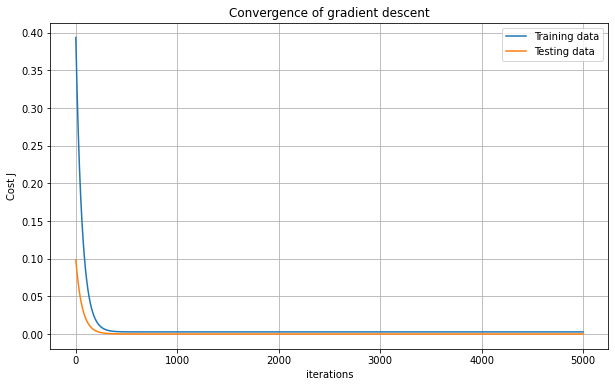

In [792]:
plt.plot(costHistoryTrain, label = "Training data")
plt.plot(costHistoryTest, label = "Testing data")
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('iterations')
plt.ylabel('Cost J')
plt.title('Convergence of gradient descent')
plt.legend()

In [793]:
print("Final Theta - ")
print(theta)

Final Theta - 
[ 9.99999244e-01 -4.95453932e-07  6.06190609e-08  1.28659290e-07
  1.08164245e-07  4.05782886e-08  5.14875188e-08  7.59147942e-08
  5.01040682e-08  1.30983936e-07  5.66143471e-08  1.16840533e-07]


3B Standardizer

In [794]:
df = pd.DataFrame(pd.read_csv('https://raw.githubusercontent.com/Onkar-Indurkar/Intro-to-ML/main/Housing.csv'))
df.head()
m = len(df)

In [795]:
#converting yes's & no's to 1s & 0s as strings cannot be used only int

list1 = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map (v1) :
    return v1.map({'yes' : 1, "no": 0})

df[list1] = df[list1] . apply(binary_map)
#df.head()

In [796]:
#To not get any faulty errors eg Nan also not asked in Q -
df = df.drop(labels = "furnishingstatus",axis=1)
#df.head()

In [797]:
#splitting dataframe into 80% training data & 20% testing data
np.random.seed(0)
dfTrain, dfTest =train_test_split(df, train_size = 0.8, test_size = 0.2)
dfTrain.shape

(436, 12)

In [798]:
list2 = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
dfTrainC = dfTrain[list2]
dfTestC = dfTest[list2]
#dfTrainC.head()

In [799]:
import warnings
warnings. filterwarnings( 'ignore' )
from sklearn. preprocessing import MinMaxScaler, StandardScaler, Normalizer

scaler = StandardScaler()  #uncomment when testing standardization
#scaler = MinMaxScaler().   #uncomment when testing Minmaxscaler
#scaler = Normalizer()       #uncomment when testing normalization

dfTrainC[list2] = scaler.fit_transform(dfTrainC[list2])
dfTestC[list2] = scaler.fit_transform(dfTestC[list2])

#dfTrainB.head(10)

In [800]:
dfTrainC.shape

(436, 12)

In [801]:
yTrainC = dfTrainC.values[:,0]
xTrainC = dfTrainC.values[:,1:12]
yTestC = dfTestC.values[:,0]
xTestC = dfTestC.values[:,1:12]
xTrainC.shape

(436, 11)

In [802]:
xTestC.shape

(109, 11)

In [803]:
#1 col of ones
x51 = np.ones((436, 1)) 
x52 = np.ones((109, 1))

In [804]:
# 1d to 2d
x61 = xTrainC.reshape(436, 11) 
x62 = xTestC.reshape(109, 11)

In [805]:
xTrainNewC = np.hstack((x31, x41))
xTestNewC = np.hstack((x32, x42))
xTrainNewC.shape

(436, 12)

In [806]:
iterations = 5000; 
alpha = 0.01;
lamda : 3

theta = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
theta

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [807]:
def compute_cost_reg(X, Y, theta, lamda): 
    predictions = X.dot(theta) 
    errors = np.subtract(predictions, Y) 
    sqrErrors = np.square(errors) 
    sqrErrors = np.sum(sqrErrors)
    reg_term = lamda * np.sum(np.square(theta))
    J = 1 / (2 * m) * np.sum(sqrErrors + reg_term) 

    return J

In [808]:
def gradient_descent_reg(X1, X2, Y1 , Y2, theta, alpha, iterations, lamda):
    costHistoryTrain = np.zeros(iterations) 
    costHistoryTest = np.zeros(iterations) 
    lamda = 3

    for i in range(iterations): 
        predictions = X1.dot(theta) 
        errors = np.subtract(predictions, Y1) 
        sum_delta = (alpha / m) * X1.transpose().dot(errors); 
        theta = theta - sum_delta;
        costHistoryTrain[i] = compute_cost_reg(X1, Y1, theta, lamda)   
        costHistoryTest[i] = compute_cost(X2, Y2, theta)
    return theta, costHistoryTrain, costHistoryTest

In [809]:
theta, costHistoryTrain, costHistoryTest = gradient_descent_reg(xTrainNewC, xTestNewC, yTrainC, yTestC, theta, alpha, iterations, lamda=3 ) 
print('Final value of theta =', theta) 
print('costHistoryTrain =', costHistoryTrain[-1], 'costHistoryTest= ', costHistoryTest[-1])

Final value of theta = [2.65932027e-16 2.86802297e-01 5.66977871e-02 2.60175344e-01
 2.00694991e-01 8.59288767e-02 8.77004251e-02 8.75035946e-02
 1.26523800e-01 2.19592261e-01 1.11768608e-01 1.60270223e-01]
costHistoryTrain = 0.13220252616113431 costHistoryTest=  0.031962987622104796


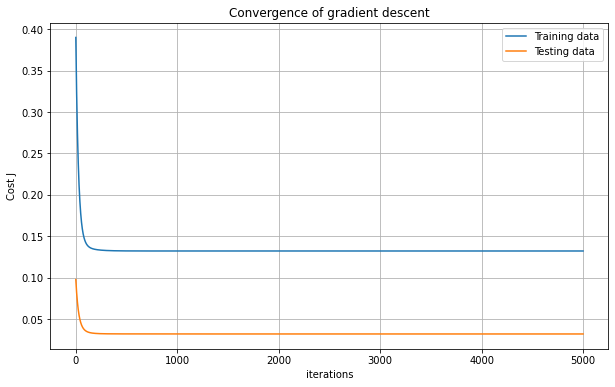

In [810]:
plt.plot(costHistoryTrain, label = "Training data")
plt.plot(costHistoryTest, label = "Testing data")
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('iterations')
plt.ylabel('Cost J')
plt.title('Convergence of gradient descent')
plt.legend()

In [811]:
print("Final Theta - ")
print(theta)

Final Theta - 
[2.65932027e-16 2.86802297e-01 5.66977871e-02 2.60175344e-01
 2.00694991e-01 8.59288767e-02 8.77004251e-02 8.75035946e-02
 1.26523800e-01 2.19592261e-01 1.11768608e-01 1.60270223e-01]
